## Import the necessary Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [4]:
price_data = pd.read_csv("Medibuddy_Insurance_Data_Personal.csv")
personal_data = pd.read_csv("Medibuddy_Insurance_Data_Price.csv")

In [5]:
price_data

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest
...,...,...,...,...
1333,PLC168400,1,yes,northeast
1334,PLC168436,0,yes,northeast
1335,PLC168634,2,yes,northeast
1336,PLC168652,0,yes,northeast


In [6]:
personal_data

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520
...,...,...,...,...,...
1333,PLC168895,50,male,30.970,10600.54830
1334,PLC168904,18,female,31.920,2205.98080
1335,PLC168913,18,female,36.850,1629.83350
1336,PLC168922,21,female,25.800,2007.94500


## Merge the data considering Policy no. as unique id

In [8]:
merged_data = pd.merge(price_data, personal_data, on="Policy no.", how="inner")
print("merged_data")
merged_data

merged_data


,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,no,southwest,23,male,34.400,1826.84300
1,PLC157033,1,no,southwest,19,male,24.600,1837.23700
2,PLC157060,0,no,southwest,56,male,40.300,10602.38500
3,PLC157087,1,no,southwest,30,female,32.400,4149.73600
4,PLC157186,5,no,southwest,19,female,28.600,4687.79700
...,...,...,...,...,...,...,...,...
1333,PLC168400,1,yes,northeast,39,male,29.925,22462.04375
1334,PLC168436,0,yes,northeast,18,female,21.660,14283.45940
1335,PLC168634,2,yes,northeast,42,male,24.605,21259.37795
1336,PLC168652,0,yes,northeast,29,female,21.850,16115.30450


In [9]:
merged_data.head(5)

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,no,southwest,23,male,34.4,1826.843
1,PLC157033,1,no,southwest,19,male,24.6,1837.237
2,PLC157060,0,no,southwest,56,male,40.3,10602.385
3,PLC157087,1,no,southwest,30,female,32.4,4149.736
4,PLC157186,5,no,southwest,19,female,28.6,4687.797


## Check for Missing Values

In [10]:
print("Missing Values:\n", merged_data.isnull().sum())

Missing Values:
 Policy no.        0
children          0
smoker            0
region            0
age               0
sex               0
bmi               0
charges in INR    0
dtype: int64


## Summary Statistics

In [11]:
print("\nSummary Statistics:\n", merged_data.describe())


Summary Statistics:
           children          age          bmi  charges in INR
count  1338.000000  1338.000000  1338.000000     1338.000000
mean      1.094918    39.207025    30.663397    13270.422265
std       1.205493    14.049960     6.098187    12110.011237
min       0.000000    18.000000    15.960000     1121.873900
25%       0.000000    27.000000    26.296250     4740.287150
50%       1.000000    39.000000    30.400000     9382.033000
75%       2.000000    51.000000    34.693750    16639.912515
max       5.000000    64.000000    53.130000    63770.428010


# Distribution Plots

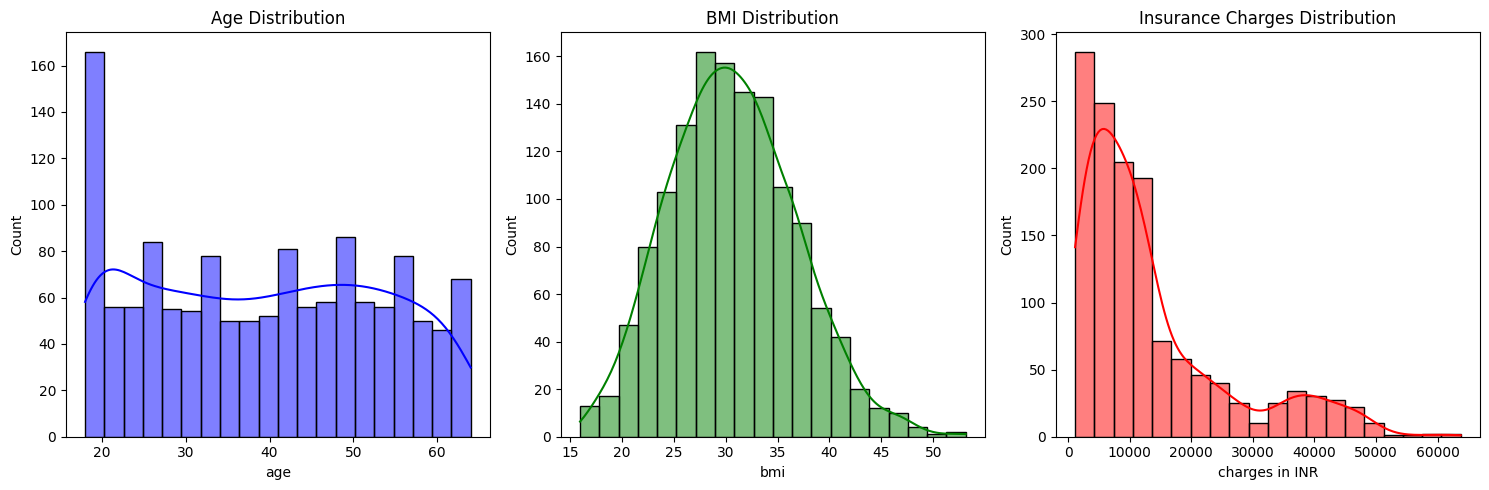

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(merged_data['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(merged_data['bmi'], bins=20, kde=True, color='green')
plt.title('BMI Distribution')

plt.subplot(1, 3, 3)
sns.histplot(merged_data['charges in INR'], bins=20, kde=True, color='red')
plt.title('Insurance Charges Distribution')

plt.tight_layout()
plt.show()

# Gender-Based Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_4136\1269962593.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=merged_data["sex"], y=merged_data["charges in INR"], palette=["#FF9999", "#66B2FF"])


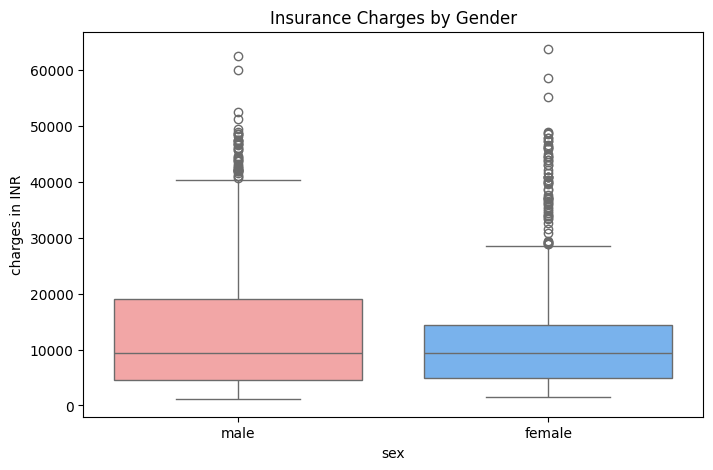

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_data["sex"], y=merged_data["charges in INR"], palette=["#FF9999", "#66B2FF"])
plt.title("Insurance Charges by Gender")
plt.show()

## Smoking Impact

C:\Users\HP\AppData\Local\Temp\ipykernel_4136\2463944541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=merged_data["smoker"], y=merged_data["charges in INR"], palette=["#66B2FF", "#FF6666"])


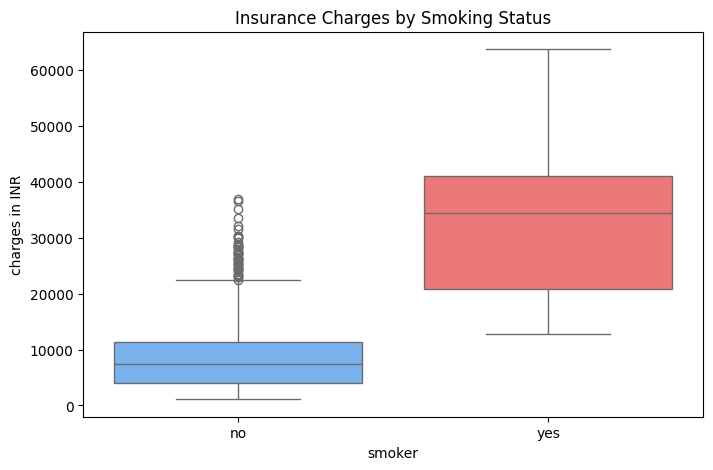

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_data["smoker"], y=merged_data["charges in INR"], palette=["#66B2FF", "#FF6666"])
plt.title("Insurance Charges by Smoking Status")
plt.show()


# Regional Variation

C:\Users\HP\AppData\Local\Temp\ipykernel_4136\3370876157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=merged_data["region"], y=merged_data["charges in INR"], palette="pastel")


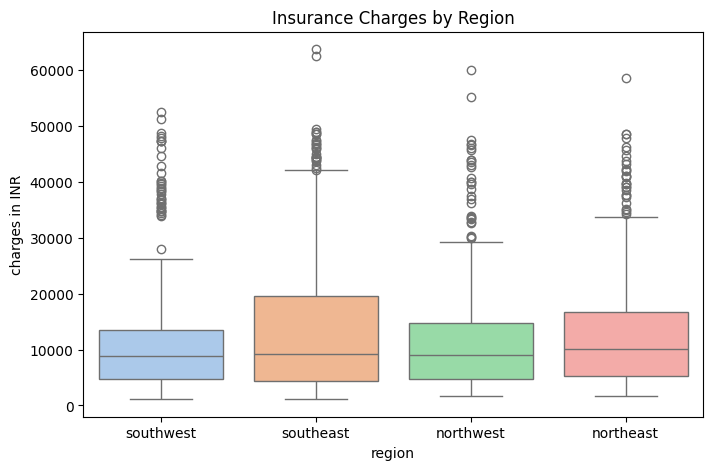

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_data["region"], y=merged_data["charges in INR"], palette="pastel")
plt.title("Insurance Charges by Region")
plt.show()

# Children Effect

C:\Users\HP\AppData\Local\Temp\ipykernel_4136\2714857371.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=merged_data["children"], y=merged_data["charges in INR"], palette="coolwarm")


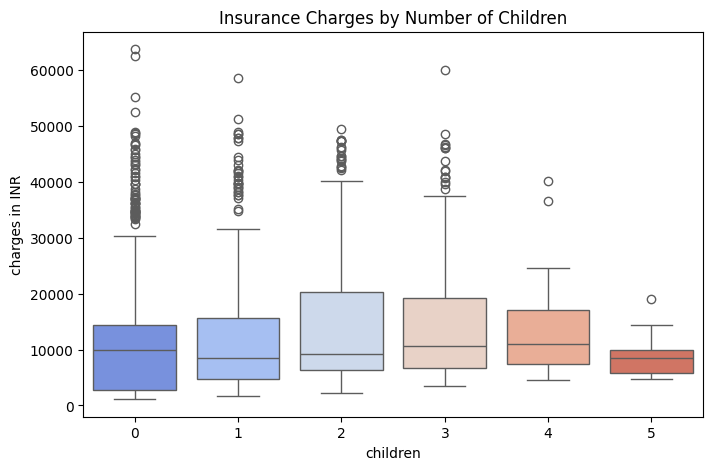

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_data["children"], y=merged_data["charges in INR"], palette="coolwarm")
plt.title("Insurance Charges by Number of Children")
plt.show()

## BMI vs Charges

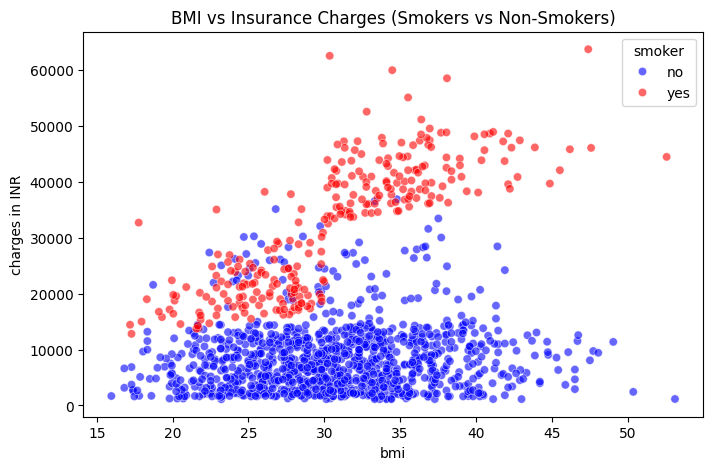

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged_data["bmi"], y=merged_data["charges in INR"], hue=merged_data["smoker"], palette=["blue", "red"], alpha=0.6)
plt.title("BMI vs Insurance Charges (Smokers vs Non-Smokers)")
plt.show()


## Age vs Charges

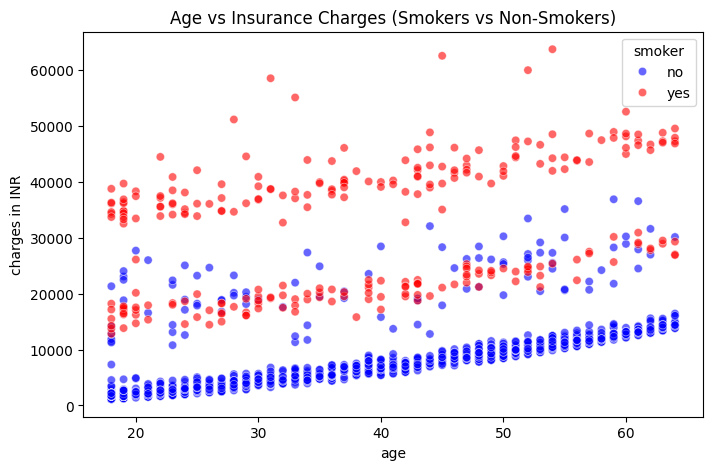

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged_data["age"], y=merged_data["charges in INR"], hue=merged_data["smoker"], palette=["blue", "red"], alpha=0.6)
plt.title("Age vs Insurance Charges (Smokers vs Non-Smokers)")
plt.show()


## Discount Opportunities: Obesity & Smoking

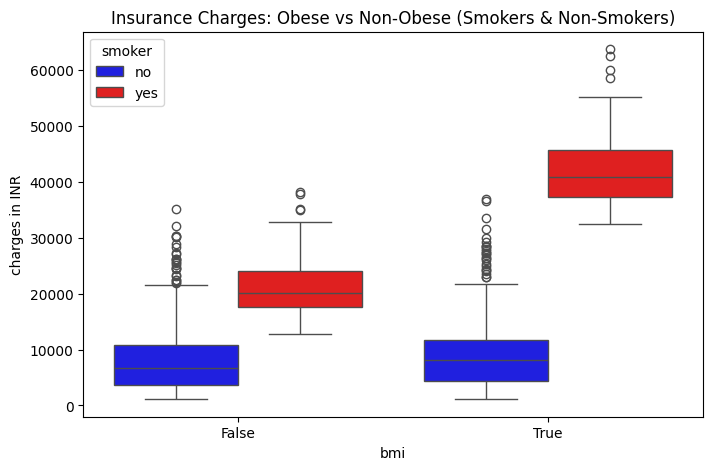


Discount Candidates: Non-Smokers with BMI < 30


In [23]:
merged_data["Obese"] = merged_data["bmi"] > 30
plt.figure(figsize=(8, 5))
sns.boxplot(x=(merged_data["bmi"] > 30), y=merged_data["charges in INR"], hue=merged_data["smoker"], palette=["blue", "red"])
plt.title("Insurance Charges: Obese vs Non-Obese (Smokers & Non-Smokers)")
plt.show()

print("\nDiscount Candidates: Non-Smokers with BMI < 30")